# KNN prediction

Import useful packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

Read the data 

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


<br />
<br />

## Process the categorical features. 

In [4]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

Check how many unique values in each categorical features

In [5]:
for column in cat_cols:
    print(column + ': ' + str(df[column].nunique()))

education: 16
occupation: 14
race: 5
relationship: 6
sex: 2
marital-status: 7
workclass: 7
native-country: 41


Here the native-country features have over 40 different values. That's too much to beconsidered as a categorical feature. We may drop this column.<br/>
We may drop education column as well as we mentioned in data prepare notebook that the education and education-num columns are redundant. 

Now we shold convert these columns in to nemurical features use one-hot encoding

In [6]:
work = pd.get_dummies(df['workclass'],drop_first=True)
#education = pd.get_dummies(df['education'],drop_first=True)
marital = pd.get_dummies(df['marital-status'],drop_first=True)
occupation = pd.get_dummies(df['occupation'],drop_first=True) 
relation = pd.get_dummies(df['relationship'],drop_first=True)
race = pd.get_dummies(df['race'],drop_first=True)
sex = pd.get_dummies(df['sex'],drop_first=True)

Concat the encoded columns in to the dataframe

In [7]:
new_data = pd.concat([df, work, marital, occupation, relation, race, sex], axis = 1)

In [8]:
new_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,0,1,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1,0,0,0,0,0,0,0,1,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,1,0,0,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,1,0,1,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,0,0,0,1,0,0,0,1,0


Now the dataframe have 65 columns, we need to remove all the string type columns since they are represented by the encoded columns.

In [9]:
KNN_data = new_data.drop(cat_cols, axis=1)

In [10]:
KNN_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,Local-gov,Private,Self-emp-inc,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,38,215646,9,0,0,40,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
2,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


Save the KNN data frame

In [11]:
KNN_data.to_csv('KNN_data.csv', index=False)

<br/>

## KNN Tain and test set 

Normalize the data set.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()

In [14]:
ss.fit(KNN_data.drop('target', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = ss.transform(KNN_data.drop('target', axis = 1))

In [16]:
scaled_features

array([[ 0.880275  , -1.00790871,  1.12896095, ..., -0.0878522 ,
         0.4038321 ,  0.69282316],
       [-0.03333799,  0.24465878, -0.43970277, ..., -0.0878522 ,
         0.4038321 ,  0.69282316],
       [ 1.10867824,  0.42520607, -1.22403463, ..., -0.0878522 ,
        -2.47627666,  0.69282316],
       ...,
       [ 1.48935032, -0.35861051, -0.43970277, ..., -0.0878522 ,
         0.4038321 , -1.44336977],
       [-1.25148865,  0.11067045, -0.43970277, ..., -0.0878522 ,
         0.4038321 ,  0.69282316],
       [ 1.03254383,  0.92880758, -0.43970277, ..., -0.0878522 ,
         0.4038321 , -1.44336977]])

In [17]:
df_features = pd.DataFrame(scaled_features, columns=KNN_data.drop('target', axis = 1).columns)

In [18]:
df_features.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male
0,0.880275,-1.007909,1.128961,-0.147437,-0.21859,-2.331495,-0.271246,-1.682251,-0.192155,3.327045,...,-0.586782,-0.174271,-0.416903,-0.345236,-0.221124,-0.174876,-0.320968,-0.087852,0.403832,0.692823
1,-0.033338,0.244659,-0.439703,-0.147437,-0.21859,-0.077735,-0.271246,0.594442,-0.192155,-0.300567,...,1.704211,-0.174271,-0.416903,-0.345236,-0.221124,-0.174876,-0.320968,-0.087852,0.403832,0.692823
2,1.108678,0.425206,-1.224035,-0.147437,-0.21859,-0.077735,-0.271246,0.594442,-0.192155,-0.300567,...,-0.586782,-0.174271,-0.416903,-0.345236,-0.221124,-0.174876,3.115571,-0.087852,-2.476277,0.692823
3,-0.794682,1.406626,1.128961,-0.147437,-0.21859,-0.077735,-0.271246,0.594442,-0.192155,-0.300567,...,-0.586782,-0.174271,-0.416903,-0.345236,4.522348,-0.174876,3.115571,-0.087852,-2.476277,-1.443370
4,-0.109472,0.897147,1.521127,-0.147437,-0.21859,-0.077735,-0.271246,0.594442,-0.192155,-0.300567,...,-0.586782,-0.174271,-0.416903,-0.345236,4.522348,-0.174876,-0.320968,-0.087852,0.403832,-1.443370


## train test split

In [19]:
X = df_features
y = KNN_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train and find a sutable k

In [20]:
accuracy = []
for n in range(1,60,3):
    classifier = KNeighborsClassifier(n_neighbors= n )
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    a = 1 - np.sum(pred != y_test) / len(y_test)
    accuracy.append(a)

0.8378826389656315
25


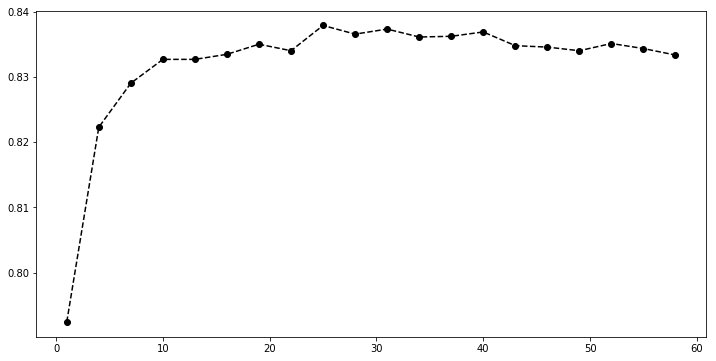

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,60,3),accuracy, 'k--o')   

print(np.max(accuracy))
index = accuracy.index(max(accuracy))
print(list(range(1,60,3))[index])

We can see that the best accuracy happens at k=25

## Use k=52 to train and test model

In [26]:
classifier = KNeighborsClassifier(n_neighbors= 25)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [27]:
print(confusion_matrix(y_test, pred))

[[6265  556]
 [ 911 1317]]


In [29]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.87      0.92      0.90      6821
          1       0.70      0.59      0.64      2228

avg / total       0.83      0.84      0.83      9049



We can see that the prediction accuracy is 83%

## Read in the test data

In [30]:
test_df = pd.read_csv('clean_test_data.csv')

In [31]:
# convert test categorical data into dummy varables
test_work = pd.get_dummies(test_df['workclass'],drop_first=True)
#test_education = pd.get_dummies(test_df['education'],drop_first=True)
test_marital = pd.get_dummies(test_df['marital-status'],drop_first=True)
test_occupation = pd.get_dummies(test_df['occupation'],drop_first=True) 
test_relation = pd.get_dummies(test_df['relationship'],drop_first=True)
test_race = pd.get_dummies(test_df['race'],drop_first=True)
test_sex = pd.get_dummies(test_df['sex'],drop_first=True)

In [32]:
test_new_data = pd.concat([test_df, test_work, 
                           test_marital, test_occupation, test_relation,
                           test_race, test_sex], axis = 1)

test_KNN_data = test_new_data.drop(cat_cols, axis=1)

In [33]:
# normalized test data set features
test_scaled_features = ss.transform(test_KNN_data.drop('target', axis = 1)) 

# The real result for test data set
test_real = test_KNN_data.target     

## Predict for the test set and compute accuracy

In [34]:
# predict using the KNN model
test_pred = classifier.predict(test_scaled_features)

In [35]:
print(classification_report(test_real, test_pred))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89     11360
          1       0.69      0.58      0.63      3700

avg / total       0.82      0.83      0.83     15060



The prediction accuracy for test data is up to 82%

In [36]:
print(confusion_matrix(test_real, test_pred))

[[10371   989]
 [ 1546  2154]]


<br/>
<br/>
The result we get for training set is 83% and the result for test set is 82%. The results are quite close, whcih indicate the KNN modle works fine. Overfiting is not happening.